In [1]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd
import seaborn as sns
%matplotlib inline

def getDistribution(keys, normalized = True):
    
    uniq_keys = np.unique(keys)
    bins = uniq_keys.searchsorted(keys)
    distr = np.bincount(bins) 

    if normalized == 1: distr = distr/float(np.sum(distr)) 

    return np.asarray(uniq_keys.tolist()), np.asarray(distr.tolist())

# Check the impact distribution

Just for quick sanity check, with log binning and without fitting here. 

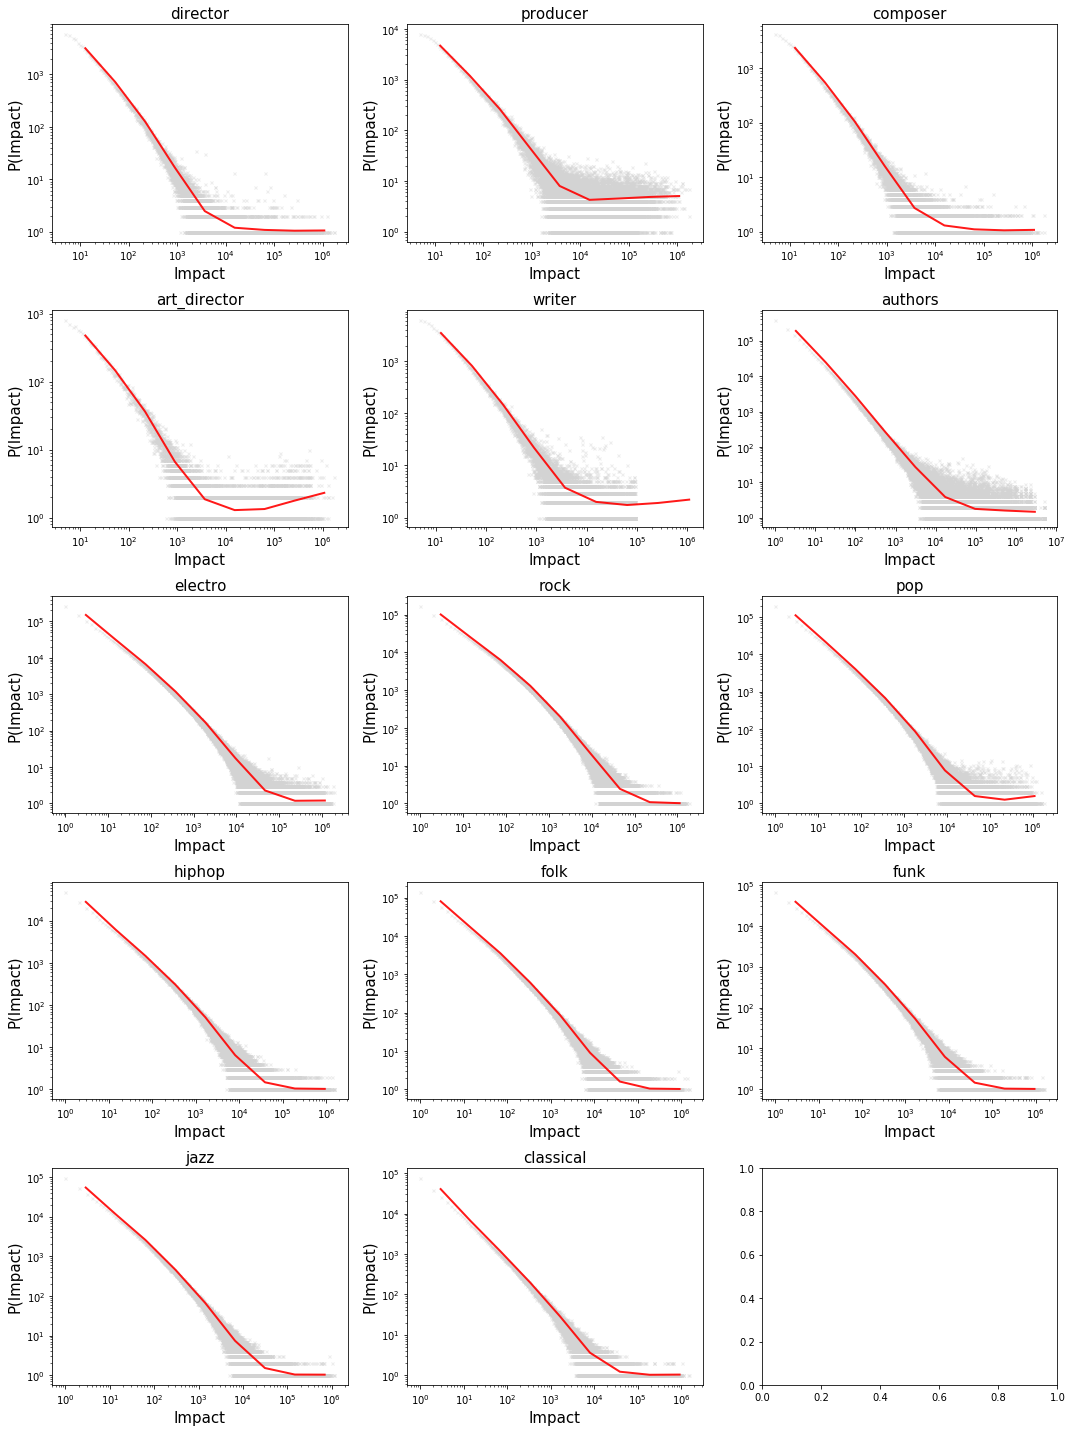

In [249]:
def plot_impact_distr(field, ax):
    
    ibinned = 'DataToPlot/1_impact_distribution/1_impact_distribution_binned_' + field + '.dat'
    idata   = 'DataToPlot/1_impact_distribution/1_impact_distribution_data_'   + field + '.dat'

    bx, by = zip(*[ tuple([float(fff) for fff in line.strip().split('\t')])  for line in open(ibinned) ])
    x,  y  = zip(*[ tuple([float(fff) for fff in line.strip().split('\t')])  for line in open(idata) ])

    ax.plot(x,  y, 'o', marker = 'x', markersize = 3, color = 'lightgrey', alpha = 0.4)
    ax.plot(bx, by, color = 'r', alpha = 0.9, linewidth = 2)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(field.split('-')[0], fontsize = 15)

    ax.set_xlabel('Impact', fontsize = 15)
    ax.set_ylabel('P(Impact)', fontsize = 15)
    
f, ax = plt.subplots(5,3, figsize = (15,20))
plot_impact_distr('director-10',     ax[0,0])  
plot_impact_distr('producer-10',     ax[0,1]) 
plot_impact_distr('composer-10',     ax[0,2])  
plot_impact_distr('art_director-10', ax[1,0]) 
plot_impact_distr('writer-10',       ax[1,1])  
plot_impact_distr('authors-10',      ax[1,2])

plot_impact_distr('electro-20',    ax[2,0])
plot_impact_distr('rock-20',       ax[2,1])
plot_impact_distr('pop-20',        ax[2,2])
plot_impact_distr('hiphop-20',     ax[3,0])
plot_impact_distr('folk-20',       ax[3,1])
plot_impact_distr('funk-20',       ax[3,2])
plot_impact_distr('jazz-20',       ax[4,0])
plot_impact_distr('classical-20',  ax[4,1])

plt.tight_layout()


# R-rule - N*/N plots

The numbers indicate the lower cutoff of the career lengths, errorbars are the stdev of values within the bins. Probably better binning could make it nicer, now its just linear binning.

ValueError: invalid literal for float(): 0.09998375757013249	0.9296636862867748	0.02570410028873103

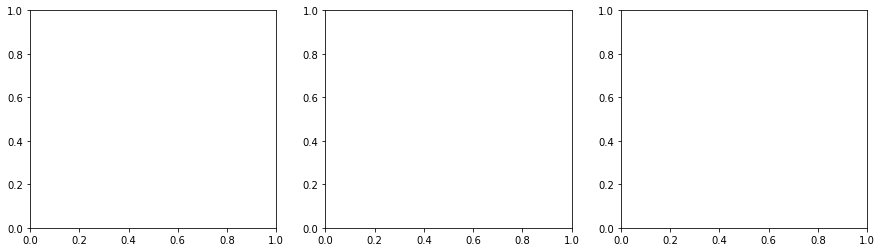

In [54]:
def get_N_star_N_plot_old(field, ax, color):
    
    values = sorted([float(line.strip()) for line in open('DataToPlot/2_N_Nstar/' + field + '_NNstar_data.dat' )])
    
    nbins = 10

    counts, bins, bars = ax.hist(values, bins = 10, cumulative = True, normed = True, alpha = 0.0)
    bins = (bins[1:] + bins[:-1])/2 
   
    ijk = 0
    error = {}

    for v in values:
        for ind, b in enumerate(bins):
            if ind == 0:
                if v < b:
                    if ind not in error:
                        error[ind] = [v]
                    else:
                        error[ind].append(v)
            else:
                if v < b and v > bins[ind-1]:
                    if ind not in error:
                        error[ind] = [v]
                    else:
                        error[ind].append(v)
    
    yerr = np.asarray([np.std(vals)  for vals in error.values()])
 
    x = np.arange(0,1, 0.1)
    ax.plot(x,x, color ='k', linewidth = 2, alpha = 1.0)
    ax.fill_between(bins, np.asarray(counts)- np.asarray(yerr), np.asarray(counts) + np.asarray(yerr), color = color, alpha = 0.3)
    ax.plot(bins, counts, color = 'grey', marker = 'o', markersize = 1)
    ax.errorbar(bins, counts, yerr = yerr, color = color)  
    ax.set_title(field, fontsize = 17)
    
    ax.set_ylabel('CDF(N*/N)', fontsize = 15)
    ax.set_xlabel('N*/N', fontsize = 15)
    
  
    for pos in ['right', 'top', 'left']:
        ax.spines[pos].set_edgecolor('white')    

    ax.tick_params(axis='x', length=6, width=2, colors='black')
    ax.tick_params(axis='y', length=6, width=2, colors='black')       
    # ax.legend(loc = 'lower left', fontsize = 10)


        
    
    
    
    
    
    
f, ax = plt.subplots(1,3, figsize = (15,4))

#get_N_star_N_plot('director-10', ax[0], 'steelblue')
#get_N_star_N_plot('electro-80',  ax[1], 'darkred')
get_N_star_N_plot('authors',  ax[2], 'darkgreen')



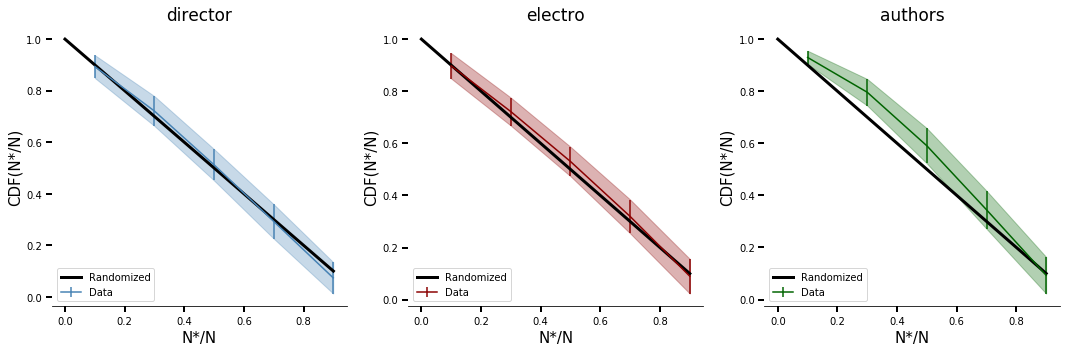

In [66]:
def get_N_star_N_plot_new(field, ax, color):
    
    xx, yy, yerr = zip(*[ (float(fff) for fff in line.strip().split('\t')) for line in open('DataToPlot/2_N_Nstar/' + field + '_NNstar_data.dat' )])
    


    x = np.arange(0,1, 0.1)
    ax.plot(x,[1.0 -  xi for xi in x], color ='k', linewidth = 3, alpha = 1.0, label= 'Randomized')

    ax.errorbar(xx, yy, yerr = yerr, color = color, label = 'Data')  
    ax.fill_between(xx, np.asarray(yy)- np.asarray(yerr), np.asarray(yy) + np.asarray(yerr), color = color, alpha = 0.3)

    ax.set_title(field, fontsize = 17)
    
    ax.set_ylabel('CDF(N*/N)', fontsize = 15)
    ax.set_xlabel('N*/N', fontsize = 15)
    
    for pos in ['right', 'top', 'left']:
        ax.spines[pos].set_edgecolor('white')    

    ax.tick_params(axis='x', length=6, width=2, colors='black')
    ax.tick_params(axis='y', length=6, width=2, colors='black')       
    ax.legend(loc = 'lower left', fontsize = 10)


        
    
    
    
        
    
    
    
    
    
    
f, ax = plt.subplots(1,3, figsize = (15,5))

get_N_star_N_plot_new('director',     ax[0], 'steelblue')
get_N_star_N_plot_new('electro',      ax[1], 'darkred')
get_N_star_N_plot_new('authors',  ax[2], 'darkgreen')


plt.tight_layout()

plt.savefig('../../../../Dropbox/Artisic_careers_paper/text/Figures/F2.png')

In [ ]:
f, ax = plt.subplots(7,4, figsize = (15,20))

get_N_star_N_plot('art_director-10', ax[0,0]) 
get_N_star_N_plot('director-10',     ax[0,2])
get_N_star_N_plot('producer-10',     ax[1,0])
get_N_star_N_plot('writer-10',       ax[1,2])
get_N_star_N_plot('composer-10',     ax[2,0])
get_N_star_N_plot('authors-50',      ax[2,3])


get_N_star_N_plot('electro-80',    ax[3,1])
get_N_star_N_plot('rock-80',       ax[3,3])
get_N_star_N_plot('pop-80',        ax[4,1])
get_N_star_N_plot('jazz-80',       ax[4,3])
get_N_star_N_plot('folk-80',       ax[5,1])
get_N_star_N_plot('funk-80',       ax[5,3])
get_N_star_N_plot('hiphop-80',     ax[6,1])
get_N_star_N_plot('classical-80',  ax[6,3])

plt.tight_layout()



# p and Q distributions

art_director-10
director-10
producer-10
writer-10
composer-10
authors-10
rock-20
hiphop-20
folk-20
funk-20
classical-20
jazz-20


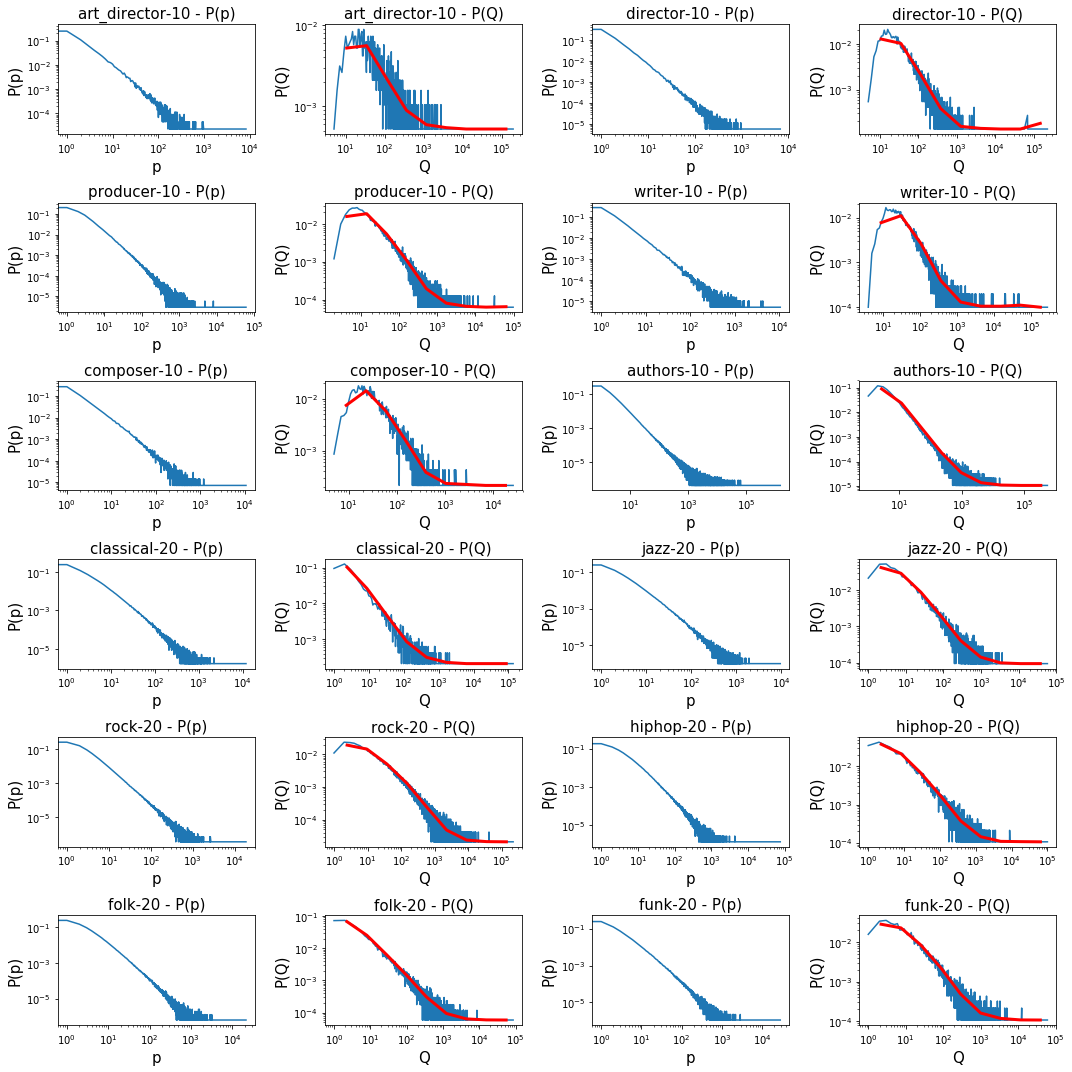

In [251]:
def do_p_Q_plots(field, ax, bx):
    
    pdata   = 'DataToPlot/3_pQ_distributions/p_distribution_data_' + field + '_0.dat'
    Qdata   = 'DataToPlot/3_pQ_distributions/Q_distribution_data_' + field + '_0.dat' 
    Qbinned = 'DataToPlot/3_pQ_distributions/Q_distribution_binned_' + field + '_0.dat' 
        
    px,  py  = zip(*[ [float(fff) for fff in line.strip().split('\t')] for line in open(pdata) if 'nan' not in line])
    Qx,  Qy  = zip(*[ [float(fff) for fff in line.strip().split('\t')] for line in open(Qdata) if 'nan' not in line])
    bQx, bQy = zip(*[ [float(fff) for fff in line.strip().split('\t')] for line in open(Qbinned) if 'nan' not in line])

    
    ax.plot(px, py)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(field + ' - P(p)', fontsize = 15)
    
    bx.plot(Qx, Qy)
    bx.set_xscale('log')
    bx.set_yscale('log')
    bx.set_title(field + ' - P(Q)', fontsize = 15)  
    
    bx.plot(bQx, bQy, linewidth = 3, color = 'r')

    ax.set_ylabel('P(p)', fontsize = 15)
    ax.set_xlabel('p', fontsize = 15)
    
    bx.set_ylabel('P(Q)', fontsize = 15)
    bx.set_xlabel('Q', fontsize = 15)
    
    
f, ax = plt.subplots(6,4, figsize = (15,15))

do_p_Q_plots('art_director-10', ax[0,0], ax[0,1]) 
do_p_Q_plots('director-10',     ax[0,2], ax[0,3]) 
do_p_Q_plots('producer-10',     ax[1,0], ax[1,1]) 
do_p_Q_plots('writer-10',       ax[1,2], ax[1,3]) 
do_p_Q_plots('composer-10',     ax[2,0], ax[2,1]) 
do_p_Q_plots('authors-10',      ax[2,2], ax[2,3]) 


do_p_Q_plots('rock-20',     ax[4,0], ax[4,1]) 
do_p_Q_plots('hiphop-20',   ax[4,2], ax[4,3])
do_p_Q_plots('folk-20',     ax[5,0], ax[5,1]) 
do_p_Q_plots('funk-20',     ax[5,2], ax[5,3])
do_p_Q_plots('classical-20',ax[3,0], ax[3,1]) 
do_p_Q_plots('jazz-20',     ax[3,2], ax[3,3])


plt.tight_layout()

# Individual luck curves 

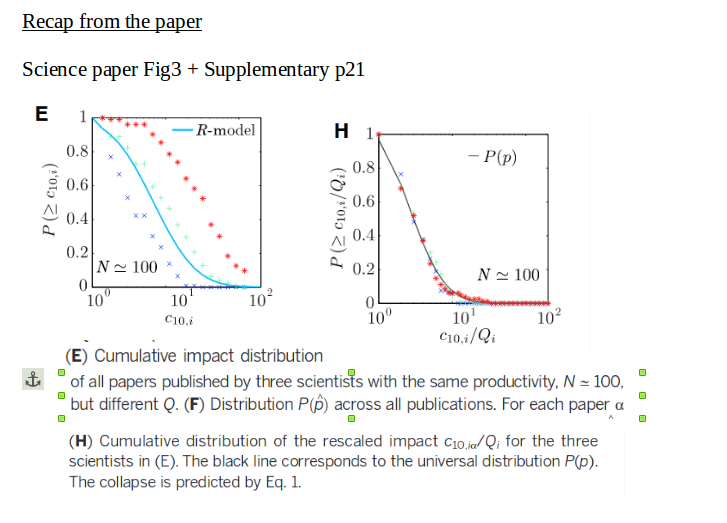

In [251]:
def get_luck_curves(field, ax, color, lim, mmin):
    
    data    = 'DataToPlot/3_pQ_distributions/p_values_of_users_' + field + '.dat'
    pvalues = {} 
    
    ijk = 0
    
    for ind, line in enumerate(open(data)):
              
        
        fields = line.strip().split('\t') 
        X = [float(x) for x in fields[1].split(';')]
        Y = [float(y) for y in fields[2].split(';')]
        
        if 'everybody' not in line:
            if len(X) > mmin and ijk < 50:
                ax.plot(X,Y, linewidth = 1.0, color = 'lightgrey', alpha = 0.25)    
                ijk += 1

        else:
            ax.plot(X,Y, linewidth = 3.5, alpha = 0.9, color = color)        
 
       
    ax.set_xscale('log')
    ax.set_title(field.split('-')[0] + ',  N > 200', fontsize = 16)
    ax.set_xlim(lim)        
        
    ax.set_ylabel('CDF(p_i,alpha)', fontsize = 15)
    ax.set_xlabel('p_i,alpha', fontsize = 15)    
    

    for pos in ['right', 'top', 'left']:
        ax.spines[pos].set_edgecolor('white')    

    ax.tick_params(axis='x', length=6, width=2, colors='black')
    ax.tick_params(axis='y', length=6, width=2, colors='black')       
    # ax.legend(loc = 'lower left', fontsize = 10)


    
    
    
    field = field.split('-')[0] + ' N >= ' + field.split('-')[1].split('_')[0]
    
    ax.set_title(field, fontsize = 16)

50
50
50


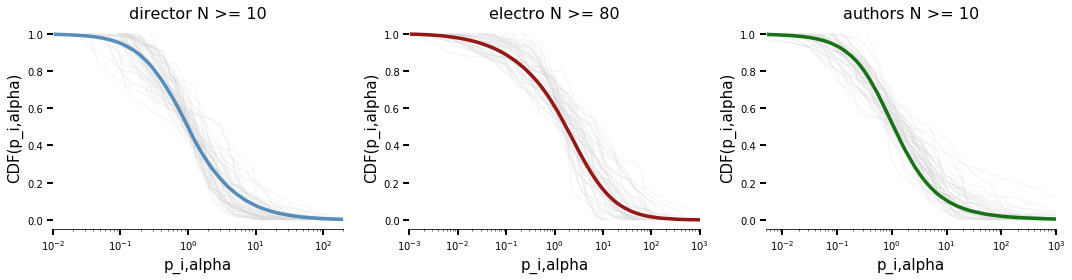

In [243]:
f, ax = plt.subplots(1,3, figsize = (15, 4))

get_luck_curves('director-10_0', ax[0], 'steelblue', [0.01,   200], 50)
get_luck_curves('electro-80_0',  ax[1], 'darkred',   [0.001, 1000], 50)
get_luck_curves('authors-10_0',  ax[2], 'darkgreen', [0.005, 1000], 50)

plt.tight_layout()

plt.savefig('../../../../Dropbox/Artisic_careers_paper/text/Figures/F4.png')

38
50
50
50
50
50


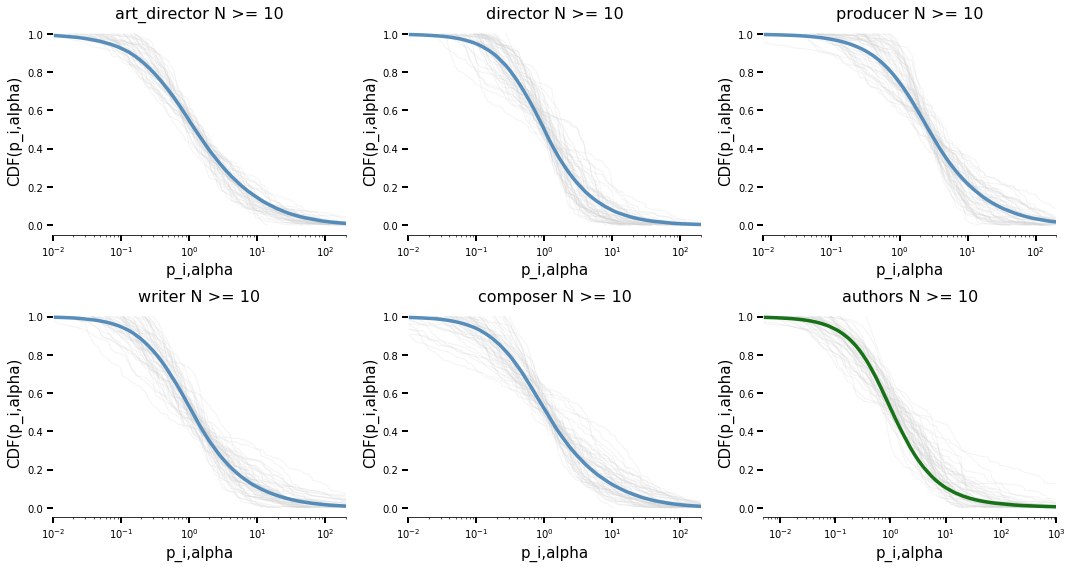

In [249]:
f, ax = plt.subplots(2,3, figsize = (15, 8))

get_luck_curves('art_director-10_0', ax[0,0], 'steelblue', [0.01,   200], 50)
get_luck_curves('director-10_0',     ax[0,1], 'steelblue', [0.01,   200], 50)
get_luck_curves('producer-10_0',     ax[0,2], 'steelblue', [0.01,   200], 50)
get_luck_curves('writer-10_0',       ax[1,0], 'steelblue', [0.01,   200], 50)
get_luck_curves('composer-10_0',     ax[1,1], 'steelblue', [0.01,   200], 50)
get_luck_curves('authors-10_0',      ax[1,2], 'darkgreen', [0.005, 1000], 50)

plt.tight_layout()
plt.savefig('../../../../Dropbox/Artisic_careers_paper/text/Figures/S4a.png')

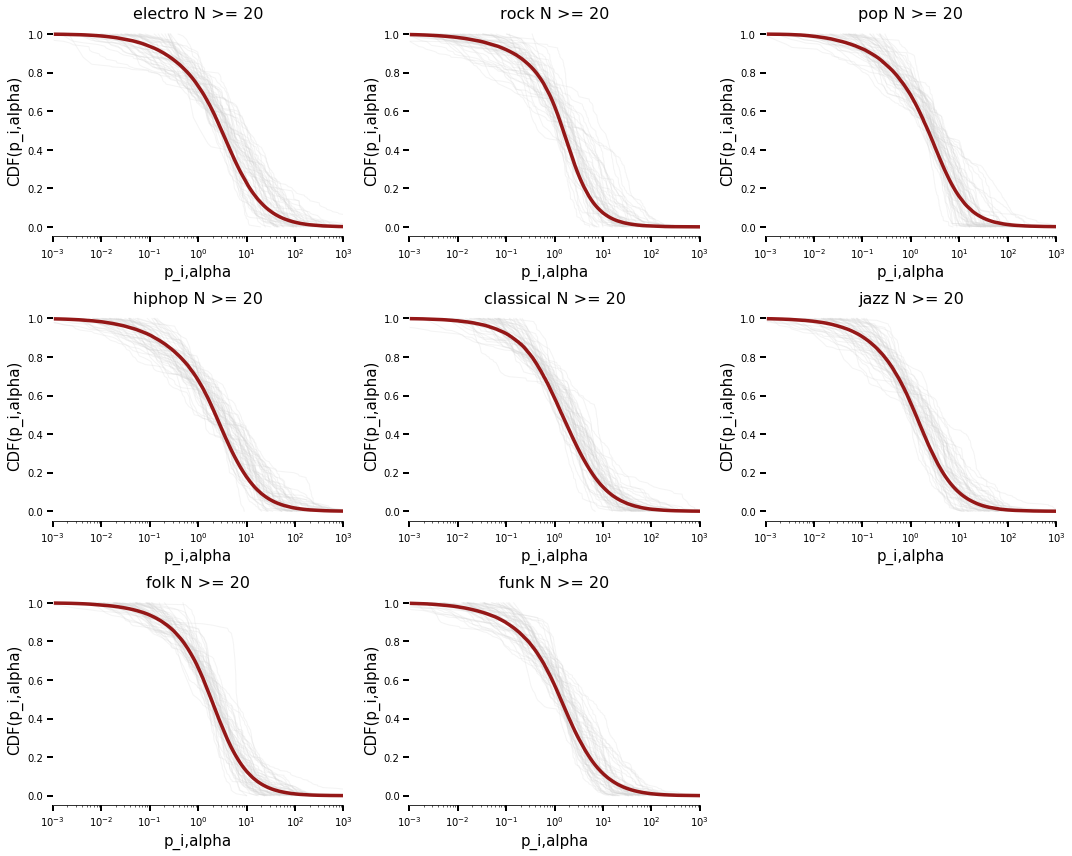

In [253]:
f, ax = plt.subplots(3,3, figsize = (15, 12))



get_luck_curves('electro-20_0',   ax[0,0], 'darkred',   [0.001, 1000], 50)
get_luck_curves('rock-20_0',      ax[0,1], 'darkred',   [0.001, 1000], 50)
get_luck_curves('pop-20_0',       ax[0,2], 'darkred',   [0.001, 1000], 50)

get_luck_curves('hiphop-20_0',    ax[1,0], 'darkred',   [0.001, 1000], 50)
get_luck_curves('classical-20_0', ax[1,1], 'darkred',   [0.001, 1000], 50)
get_luck_curves('jazz-20_0',      ax[1,2], 'darkred',   [0.001, 1000], 50)

get_luck_curves('folk-20_0',      ax[2,0], 'darkred',   [0.001, 1000], 50)
get_luck_curves('funk-20_0',      ax[2,1], 'darkred',   [0.001, 1000], 50)

ax[2,2].axis('off')

plt.tight_layout()
plt.savefig('../../../../Dropbox/Artisic_careers_paper/text/Figures/S4b.png')

# Fittin the R and Q models onto the N - I* data

The length of the career vs the impact of the highest impact piece (more precisely log I). I show two different career length cutoffs, indicating the number of users being included on each plot. I use 10 bins with logarithmic binning, and the best solutions from the optimization. I also tried differetn solutions from the optimization (e.g. top 5) - they all show similar results. At the end, the plots look very similar. Haven't done R^2 stats yet.

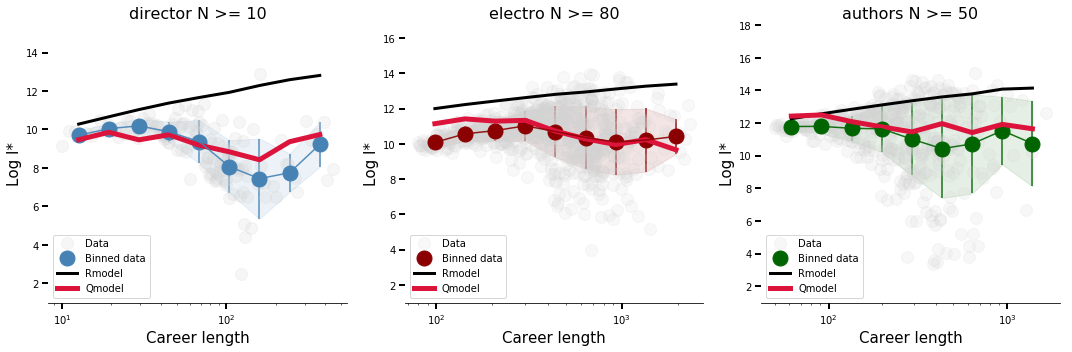

In [52]:
def plot_RQmodel(field, ax,  colors):

    root   = 'DataToPlot/4_RQModel/'
    data   = root + '4_RQModel_data_'   + field + '.dat'
    binned = root + '4_RQModel_binned_' + field + '.dat'
    rmodel = root + '4_RQModel_rmodel_' + field + '.dat'
    qmodel = root + '4_RQModel_qmodel_' + field + '.dat'

    x,    y     = zip(*[ tuple([float(fff) for fff in line.strip().split('\t')])   for line in open(data)    ])  
    bx,   by, e = zip(*[ tuple([float(fff) for fff in line.strip().split('\t')])   for line in open(binned)  ])
    bxR, byR    = zip(*[ tuple([float(fff) for fff in line.strip().split('\t')])   for line in open(rmodel)  ])
    bxQ, byQ    = zip(*[ tuple([float(fff) for fff in line.strip().split('\t')])   for line in open(qmodel)  ])

    
    NNN    = len(x)
    alpha_ = 1.0/math.log(NNN)
    
    
    
    ax.plot(x,  y,   'o', markersize = 12, alpha = alpha_, color = 'lightgrey', label = 'Data')#    ax.plot(bNs, bIstars, 'r', linewidth = 3)
    ax.plot(bx, by,  'o', color = colors, markersize = 15, label = 'Binned data')
    ax.errorbar(bx, by, yerr = e, color = colors, markersize = 15, alpha = 0.9)

    ax.plot(bxR, byR ,  'k', linewidth = 3, label= 'Rmodel')
    ax.plot(bxQ, byQ , 'g', linewidth = 5, color = 'crimson', label = 'Qmodel')
    
    
    
    ax.set_xscale('log')
    ax.set_ylim([1, 1.2*max(y)])
    ax.set_xlabel('Career length', fontsize = 15)
    ax.set_ylabel('Log I*', fontsize = 15)
    ax.fill_between(bx, np.asarray(by)- np.asarray(e), np.asarray(by) + np.asarray(e), color =  colors, alpha = 0.1)

    for pos in ['right', 'top', 'left']:
        ax.spines[pos].set_edgecolor('white')    
    
     #for pos in ['right', 'top', 'left', 'bottom']:
     #   ax.spines[pos].set_edgecolor('black')

    ax.tick_params(axis='x', length=6, width=2, colors='black')
    ax.tick_params(axis='y', length=6, width=2, colors='black')       
    #ax.set_xticklabels([])
    #ax.set_yticklabels([])
    ax.legend(loc = 'lower left', fontsize = 10)


    
    
    
    field = field.split('-')[0] + ' N >= ' + field.split('-')[1].split('_')[0]
    
    ax.set_title(field, fontsize = 16)

  
colors = {  'film' :  sns.color_palette("GnBu_d"),
            'book' :  sns.light_palette("green"),         
            'music' :  sns.light_palette("red"),         
         
         }


f, ax = plt.subplots(1,3, figsize = (15,5))
plot_RQmodel('director-10_0',  ax[0],  'steelblue'   )  
plot_RQmodel('electro-80_0',   ax[1], 'darkred'   )   
plot_RQmodel('authors-50_0',   ax[2], 'darkgreen')  



plt.tight_layout()  
plt.savefig('../../../../Dropbox/Artisic_careers_paper/text/Figures/F3.png')

(0.21697808535178778, 0.3273356401384083, 0.36941176470588233)

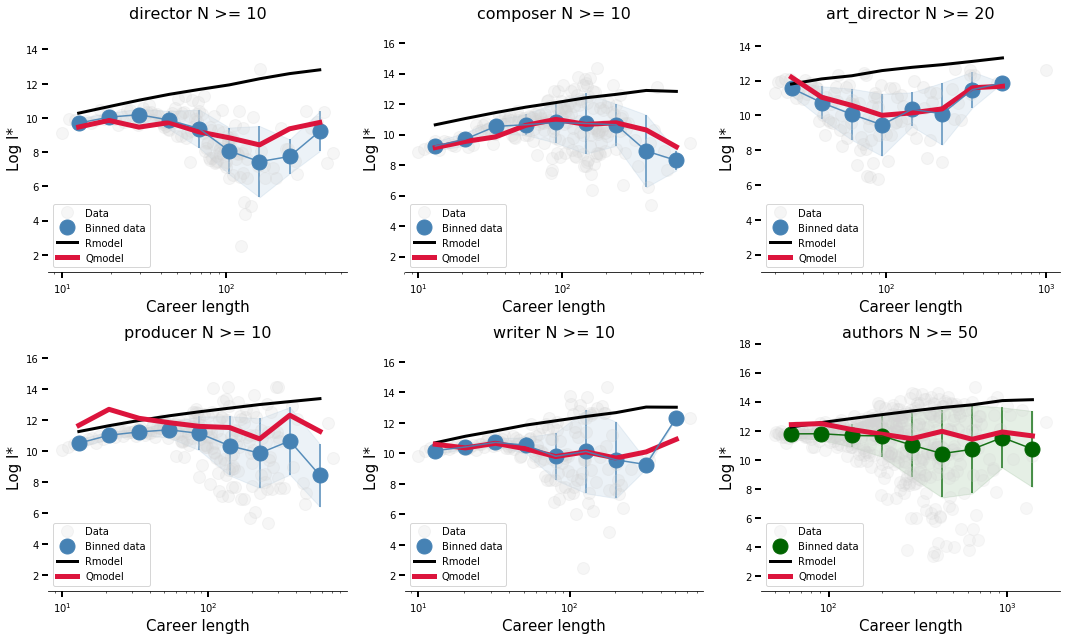

In [66]:
f, ax = plt.subplots(2,3, figsize = (15,9))
plot_RQmodel('director-10_0',     ax[0,0],  'steelblue'   )  
plot_RQmodel('composer-10_0',     ax[0,1],  'steelblue'   )  
plot_RQmodel('art_director-20_0', ax[0,2],  'steelblue'   )  
plot_RQmodel('producer-10_0',     ax[1,0],  'steelblue'   )  
plot_RQmodel('writer-10_0',       ax[1,1],  'steelblue'   )
plot_RQmodel('authors-50_0',      ax[1,2],  'darkgreen'   ) 

plt.tight_layout()
plt.savefig('../../../../Dropbox/Artisic_careers_paper/text/Figures/S3a.png')

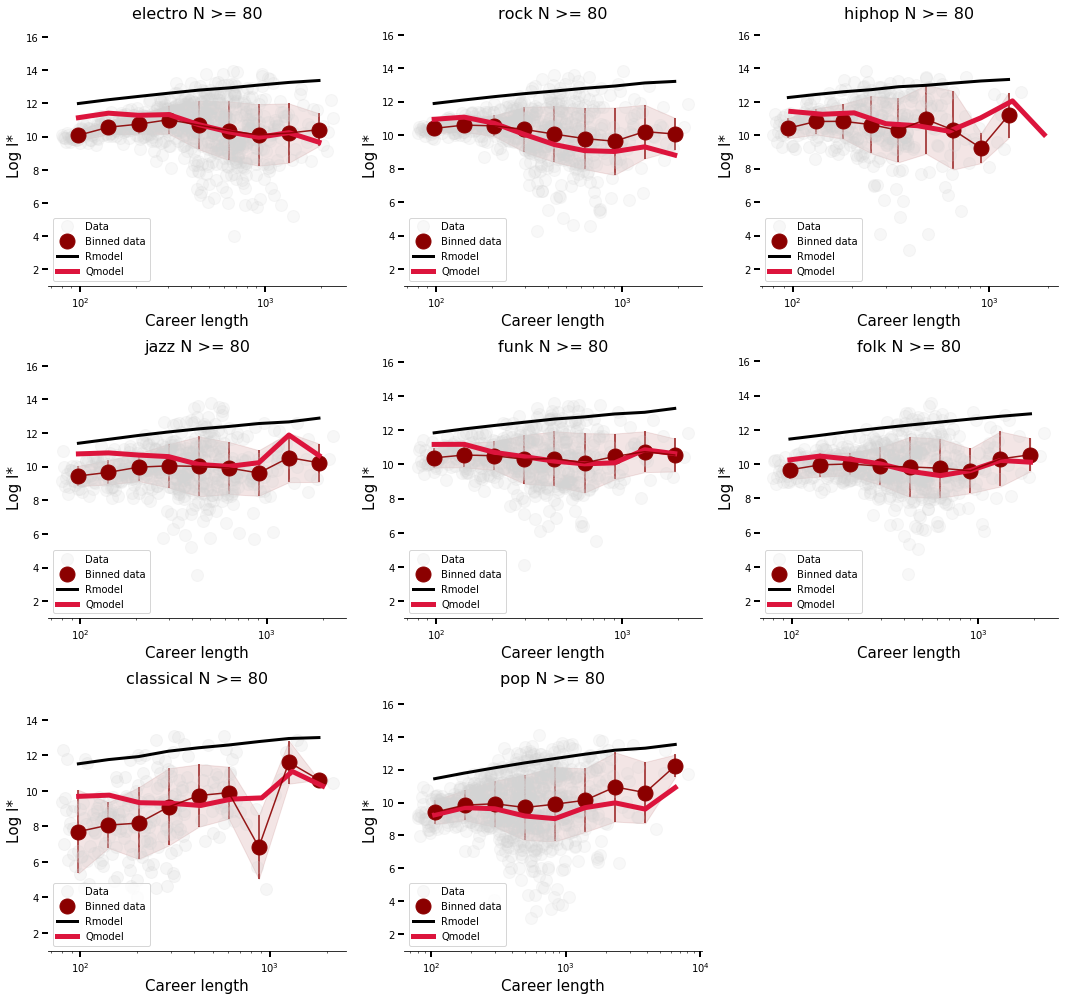

In [69]:
f, ax = plt.subplots(3,3, figsize = (15,14))

plot_RQmodel('electro-80_0',   ax[0,0], 'darkred') 
plot_RQmodel('rock-80_0',      ax[0,1], 'darkred') 
plot_RQmodel('hiphop-80_0',    ax[0,2], 'darkred')  
plot_RQmodel('jazz-80_0',      ax[1,0], 'darkred')  
plot_RQmodel('funk-80_0',      ax[1,1], 'darkred') 
plot_RQmodel('folk-80_0',      ax[1,2], 'darkred')
plot_RQmodel('classical-80_0', ax[2,0], 'darkred')
plot_RQmodel('pop-80_0',       ax[2,1], 'darkred')
ax[2,2].axis('off')

plt.tight_layout()
plt.savefig('../../../../Dropbox/Artisic_careers_paper/text/Figures/S3b.png')

# Luck and skill

In [86]:
pdata = {}
qdata = {}

for line in open('DataToPlot/5_LuckSkill/p_avg_std.dat'):
    if '0_0.dat' in line:
        line  = line.strip().split('\t')
        field = line[0].replace('p_distribution_', '').rsplit('_', 1)[0]
        pdata[field] = [float(fff) for fff in line[1:]]
        
for line in open('DataToPlot/5_LuckSkill/Q_avg_std.dat'):
    if '0_0.dat' in line:
        line  = line.strip().split('\t')
        field = line[0].replace('Q_distribution_', '').rsplit('_', 1)[0]
        print field
        qdata[field] = [float(fff) for fff in line[1:]]        

folk-40
authors-50
art_director-20
art-director-10
funk-60
writer-10
composer-10
composer-20
producer-20
art-director-20
producer-10
director-10
funk-80
hiphop-40
director-20
funk-40
funk-20
writer-20


In [87]:
qdata

{'art-director-10': [3223.8775102231702, 12798.976557581995, 1916.0],
 'art-director-20': [1960.619329645732, 7125.10645381741, 602.0],
 'art_director-20': [1375.034243662653, 4997.0281600771295, 602.0],
 'authors-50': [280.23863410050143, 1414.5308924115232, 8070.0],
 'composer-10': [217.65042294527638, 1008.8666028541435, 4638.0],
 'composer-20': [337.2260193838837, 1421.6228651575748, 2152.0],
 'director-10': [380.48535181244824, 3308.6798386050878, 7389.0],
 'director-20': [280.9427643797547, 1888.698594230046, 2737.0],
 'folk-40': [444.4037793335236, 2511.2764301950965, 11086.0],
 'funk-20': [494.61330010320484, 2175.3701658077453, 9283.0],
 'funk-40': [396.15066304251457, 1677.8633028771546, 6010.0],
 'funk-60': [588.2732282122065, 2485.043006187819, 4362.0],
 'funk-80': [278.3487425124283, 1441.359656355417, 13317.0],
 'hiphop-40': [669.6792303830638, 2970.148577276915, 5719.0],
 'producer-10': [549.6875914637263, 2748.317516413786, 15925.0],
 'producer-20': [1591.571867466532, 

In [88]:
pdata

{'art-director-10': [12.217615600830753, 92.12418095493204, 43981.0],
 'art-director-20': [9.396325226527994, 63.99718116024771, 26568.0],
 'art_director-20': [13.39795900401798, 91.25180975033427, 26568.0],
 'authors-50': [79.86594046025556, 3143.625192267607, 801506.0],
 'composer-10': [9.764202955684476, 85.43032576812494, 138069.0],
 'composer-20': [9.832576621842131, 87.94861160679146, 104948.0],
 'director-10': [5.871950211151327, 43.07851810596627, 165682.0],
 'director-20': [6.151913008620257, 42.17869370189053, 103747.0],
 'folk-40': [7.120945755424421, 53.95168546055791, 1389474.0],
 'funk-20': [7.269663294816331, 56.72097316744531, 890848.0],
 'funk-40': [10.983678181651818, 85.22312695299301, 799149.0],
 'funk-60': [7.913133248323064, 61.4013235269501, 718853.0],
 'funk-80': [10.698263457785648, 83.97649449012741, 945393.0],
 'hiphop-40': [10.033291921158478, 117.29232212936914, 607986.0],
 'producer-10': [22.319425414372578, 250.95230646041554, 337712.0],
 'producer-20': [

Text(50,4.5,'PURE LUCK')

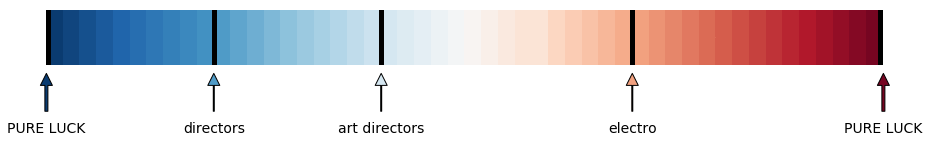

In [189]:
NNN    = 50.0
values = np.arange(0.0,1.0,1.0/NNN)
f, ax  = plt.subplots(1,1, figsize = (15,1))
colors = sns.color_palette("RdBu_r", int(NNN))
values = np.asarray([np.asarray(values), np.asarray(values)])

sns.heatmap(values, cmap=colors,  ax = ax, vmin=0, vmax = 1,linewidths = 0, cbar= False)
ax.axis('off')



actual_data = { 'directors'     : 0.2, 
                'art directors' : 0.4, 
                'electro'       : 0.7 
                }


for title, val in actual_data.items():

    xcoord = val * NNN
    
    ax.axvline(x=xcoord, ymin=-0.5, ymax=5.5, color = 'k', linewidth = 5)
  
    ax.annotate(title, xy=(xcoord, 2), xytext=(xcoord, 4.5), horizontalalignment = 'center', fontsize = 14,
                arrowprops=dict(facecolor=colors[int(xcoord)], shrink=0.15,width = 1),)
    
 
ax.axvline(x=0, ymin=-0.5, ymax=5.5, color = 'k', linewidth = 10)
ax.annotate('PURE LUCK', xy=(0, 2), xytext=(0, 4.5), horizontalalignment = 'center', fontsize = 14,
                arrowprops=dict(facecolor=colors[0], shrink=0.15,width = 3), )

ax.axvline(x=NNN, ymin=-0.5, ymax=5.5, color = 'k', linewidth = 10)
ax.annotate('PURE LUCK', xy=(NNN, 2), xytext=(NNN, 4.5), horizontalalignment = 'center', fontsize = 14,
                arrowprops=dict(facecolor=colors[-1], shrink=0.15,width = 3), )